# Sales Analysis 2023

#### Rizky Nurhidayat | 16/08/2024

In [1]:
import os
import pandas as pd

## Data Prepartation

#### Data Merging

In [2]:
files = [file for file in os.listdir('Dataset/Sales Data') if not file.startswith('.')]

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv('Dataset/Sales Data/'+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data.csv", index=False)

In [3]:
df = pd.read_csv("all_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2023 8:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2023 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,4/12/2023 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,4/12/2023 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Data Cleaning

In [4]:
df = df[df['Order Date'].str[0:2]!='Or']
df = df.dropna()
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2023 8:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2023 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,4/12/2023 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,4/12/2023 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,4/30/2023 9:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [6]:
df['Month'] = pd.to_datetime(df['Order Date']).dt.month
df['Day'] = pd.to_datetime(df['Order Date']).dt.weekday
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Hour
0,176558,USB-C Charging Cable,2,11.95,4/19/2023 8:46,"917 1st St, Dallas, TX 75001",4,2,8
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2023 22:30,"682 Chestnut St, Boston, MA 02215",4,4,22
3,176560,Google Phone,1,600.00,4/12/2023 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2,14
4,176560,Wired Headphones,1,11.99,4/12/2023 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2,14
5,176561,Wired Headphones,1,11.99,4/30/2023 9:27,"333 8th St, Los Angeles, CA 90001",4,6,9


In [7]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Hour,City
0,176558,USB-C Charging Cable,2,11.95,4/19/2023 8:46,"917 1st St, Dallas, TX 75001",4,2,8,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2023 22:30,"682 Chestnut St, Boston, MA 02215",4,4,22,Boston (MA)
3,176560,Google Phone,1,600.00,4/12/2023 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2,14,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,4/12/2023 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2,14,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,4/30/2023 9:27,"333 8th St, Los Angeles, CA 90001",4,6,9,Los Angeles (CA)


In [8]:
df['Sales'] = df['Quantity Ordered'].astype('int') * df['Price Each'].astype('float')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Hour,City,Sales
0,176558,USB-C Charging Cable,2,11.95,4/19/2023 8:46,"917 1st St, Dallas, TX 75001",4,2,8,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2023 22:30,"682 Chestnut St, Boston, MA 02215",4,4,22,Boston (MA),99.99
3,176560,Google Phone,1,600.00,4/12/2023 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2,14,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,4/12/2023 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2,14,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,4/30/2023 9:27,"333 8th St, Los Angeles, CA 90001",4,6,9,Los Angeles (CA),11.99


## Exploratory Data Analysis (EDA)

#### Sales by Month

<Axes: xlabel='Month'>

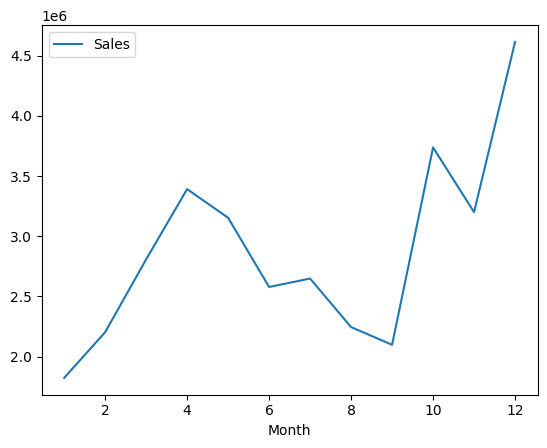

In [9]:
df[['Month', 'Sales']].groupby('Month').sum().plot()

#### Best Selling Cities

<Axes: ylabel='City'>

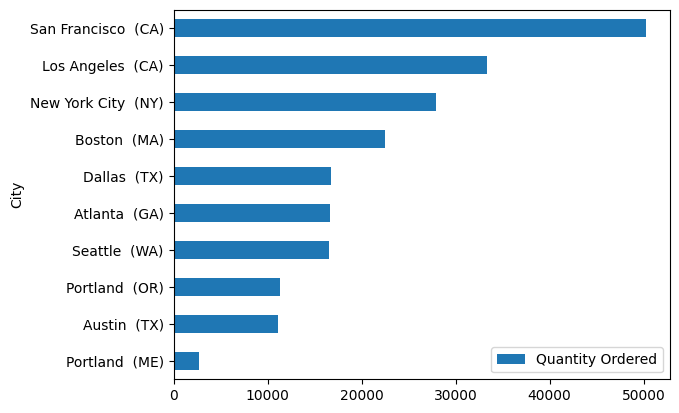

In [10]:
df[['City', 'Quantity Ordered']].groupby('City').sum().sort_values(by='Quantity Ordered').plot.barh()

#### Best Selling Days

<Axes: xlabel='Day'>

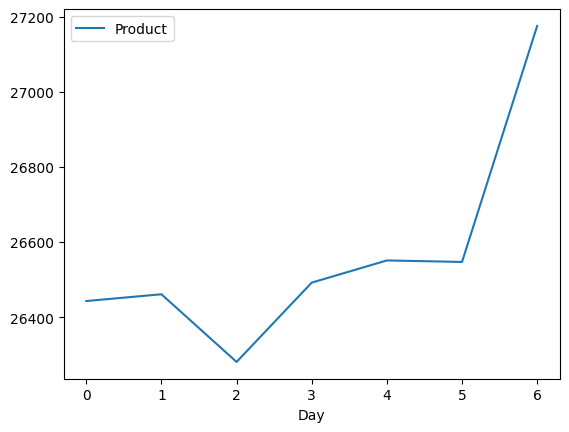

In [11]:
df[['Day', 'Product']].groupby('Day').count().plot()

#### Best Selling Hours

<Axes: xlabel='Hour'>

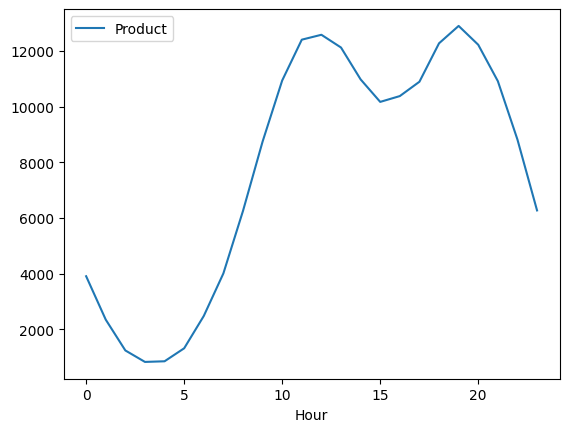

In [12]:
df[['Hour', 'Product']].groupby('Hour').count().plot()

#### The Most Sold Product

<Axes: ylabel='Product'>

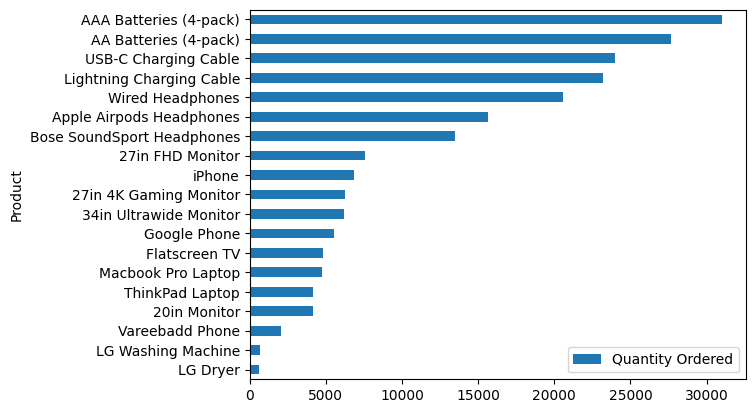

In [13]:
df[['Product', 'Quantity Ordered']].groupby('Product').sum().sort_values(by='Quantity Ordered').plot.barh()

#### Why that product sold most?

<Axes: ylabel='Product'>

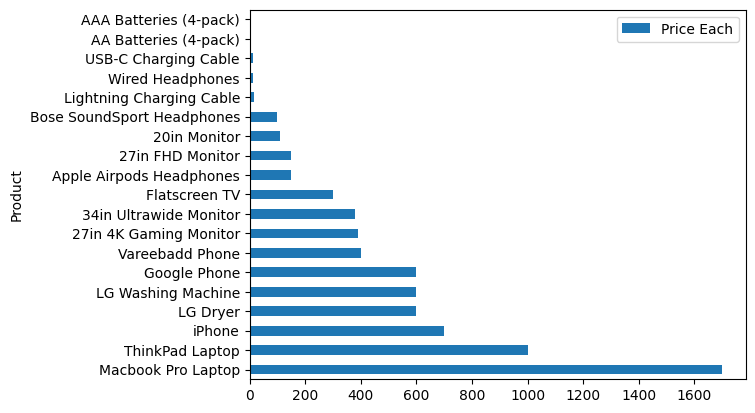

In [14]:
df[['Product', 'Price Each']].groupby('Product').mean().sort_values(by='Price Each', ascending=False).plot.barh()

#### Products Sold vs Product Prices

<Axes: xlabel='Quantity Ordered', ylabel='Price Each'>

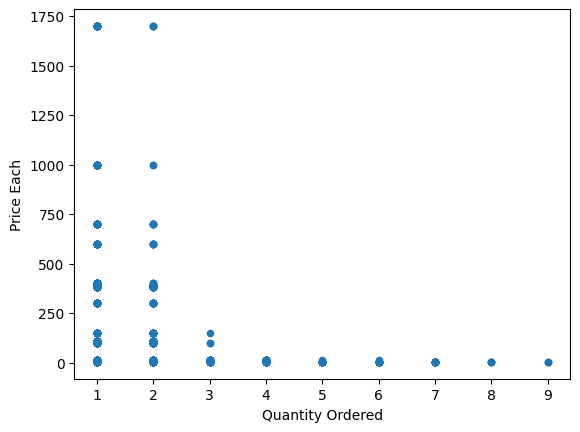

In [15]:
df.plot.scatter(x='Quantity Ordered', y='Price Each')